<h1 align=center> Exploratory Data Analysis

### New York City Taxi trip Records

A partir de la data preprocesada de nulos, duplicados y outliers, se realiza un análisis inicial de la data disponible

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cargamos la data de viajes de Taxis Verdes en Diciembre 2019

In [2]:
df = pd.read_parquet(r'C:\Users\migue\Downloads\green_tripdata_2019-12.parquet', engine='pyarrow')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,None,0.3,4.30,2.0,1.0,0.0
1,2,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,None,0.3,8.84,1.0,1.0,0.0
2,2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0
3,2,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,None,0.3,15.30,2.0,1.0,0.0
4,2,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455289,2,2019-12-31 23:24:00,2019-12-31 23:40:00,None,NaN,185,247,NaN,9.35,22.09,0.00,0.0,0.00,0.0,None,0.3,22.39,NaN,NaN,NaN
455290,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,35.95,2.75,0.5,0.00,0.0,None,0.3,39.50,NaN,NaN,NaN
455291,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,16.87,0.00,0.5,0.00,0.0,None,0.3,17.67,NaN,NaN,NaN
455292,2,2019-12-31 23:52:00,2020-01-01 00:05:00,None,NaN,42,244,NaN,2.43,21.15,2.75,0.5,0.00,0.0,None,0.0,24.40,NaN,NaN,NaN


In [3]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['day'] = df['lpep_pickup_datetime'].dt.day_name()
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour
0,1,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,...,0.00,0.0,None,0.3,4.30,2.0,1.0,0.0,Sunday,0
1,2,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,...,2.04,0.0,None,0.3,8.84,1.0,1.0,0.0,Sunday,0
2,2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,...,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0,Sunday,0
3,2,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,...,0.00,0.0,None,0.3,15.30,2.0,1.0,0.0,Sunday,0
4,2,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,...,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455289,2,2019-12-31 23:24:00,2019-12-31 23:40:00,None,NaN,185,247,NaN,9.35,22.09,...,0.00,0.0,None,0.3,22.39,NaN,NaN,NaN,Tuesday,23
455290,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,35.95,...,0.00,0.0,None,0.3,39.50,NaN,NaN,NaN,Tuesday,23
455291,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,16.87,...,0.00,0.0,None,0.3,17.67,NaN,NaN,NaN,Tuesday,23
455292,2,2019-12-31 23:52:00,2020-01-01 00:05:00,None,NaN,42,244,NaN,2.43,21.15,...,0.00,0.0,None,0.0,24.40,NaN,NaN,NaN,Tuesday,23


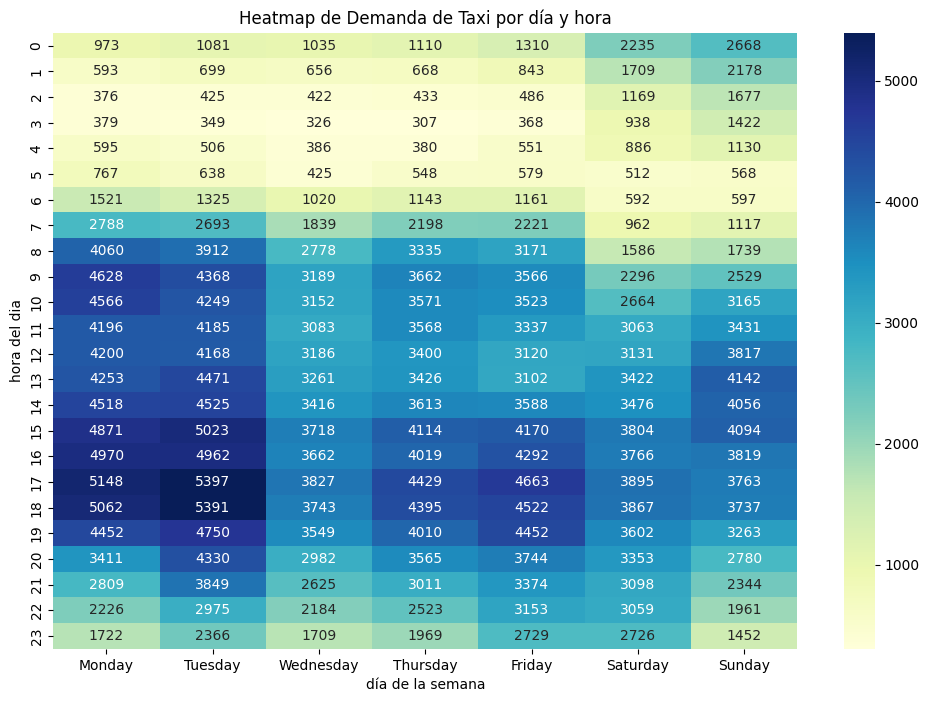

In [17]:
# Crear una tabla pivote con las horas como filas, los días de la semana como columnas y el conteo de registros como valores
pivot_table = df.pivot_table(index='hour', columns='day', aggfunc='size', fill_value=0)

# Ordenar las columnas de la tabla pivote para que los días estén en el orden correcto
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[ordered_days]

# Crear el heatmap usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap de Demanda de Taxi por día y hora')
plt.xlabel('día de la semana')
plt.ylabel('hora del dia')
plt.show()

Observamos que la mayor demanda de taxis verdes se produce los días Lunes y Martes entre las 16 y 18 hrs. Tambien algunos viajes Viernes y Sabado cercano a medianoche y muy baja demanda antes de las 6 am

In [5]:
df1 = pd.read_parquet(r'C:\Users\migue\Downloads\yellow_tripdata_2019-12.parquet', engine='pyarrow')
df1.shape[0]

6896317

Considerando que en el mes de Diciembre se registraron 6896317 de viajes en taxis Amarillos y 455294 viajes en Taxis Verdes, podemos graficar su distribución respecto al total de demanda de Taxis

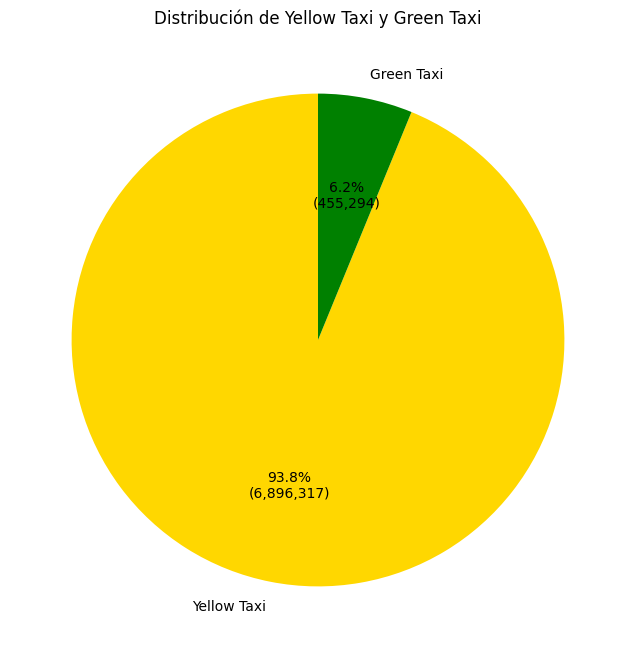

In [7]:
values = [6896317, 455294]
labels = ['Yellow Taxi', 'Green Taxi']

# Función para mostrar tanto el porcentaje como el valor absoluto
def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:,})'
    return inner_autopct

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct=autopct_format(values), startangle=90, colors=['gold', 'green'])

# Añadir un título
plt.title('Distribución de Yellow Taxi y Green Taxi')

# Mostrar el gráfico
plt.show()

Observamos que los viajes en Taxi Verde constituyen un 6.2% de los viajes en Taxis durante ese período

Analizaremos la cantidad de viajes por Borough, para esto debemos abrir y merge con el dataset 'Service Zones'

In [8]:
df1 = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Dataset Taxis\data_limpia\Service Zones.csv')
df1

,LocationID,Borough,Zone,service_zone,Shape_Leng,Shape_Area
0,1,EWR,Newark Airport,EWR,0.116357,0.000782
1,2,Queens,Jamaica Bay,Boro Zone,0.433470,0.004866
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,0.084341,0.000314
3,4,Manhattan,Alphabet City,Yellow Zone,0.043567,0.000112
4,5,Staten Island,Arden Heights,Boro Zone,0.092146,0.000498
...,...,...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone,0.126750,0.000395
259,260,Queens,Woodside,Boro Zone,0.133514,0.000422
260,261,Manhattan,World Trade Center,Yellow Zone,0.027120,0.000034
261,262,Manhattan,Yorkville East,Yellow Zone,0.049064,0.000122


dejamos solo columnas de interés para el merge

In [9]:
columnas = ['LocationID', 'Borough', 'Zone']
df1 = df1[columnas]
df1

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
258,259,Bronx,Woodlawn/Wakefield
259,260,Queens,Woodside
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East


realizamos el merge

In [12]:
df = pd.merge(df, df1, left_on='PULocationID', right_on='LocationID', how='left')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,LocationID,Borough,Zone
0,1,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,...,0.3,4.30,2.0,1.0,0.0,Sunday,0,145.0,Queens,Long Island City/Hunters Point
1,2,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,...,0.3,8.84,1.0,1.0,0.0,Sunday,0,24.0,Manhattan,Bloomingdale
2,2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,...,0.3,5.80,2.0,1.0,0.0,Sunday,0,74.0,Manhattan,East Harlem North
3,2,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,...,0.3,15.30,2.0,1.0,0.0,Sunday,0,255.0,Brooklyn,Williamsburg (North Side)
4,2,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,...,0.3,5.80,2.0,1.0,0.0,Sunday,0,80.0,Brooklyn,East Williamsburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456571,2,2019-12-31 23:24:00,2019-12-31 23:40:00,None,NaN,185,247,NaN,9.35,22.09,...,0.3,22.39,NaN,NaN,NaN,Tuesday,23,185.0,Bronx,Pelham Parkway
456572,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,35.95,...,0.3,39.50,NaN,NaN,NaN,Tuesday,23,51.0,Bronx,Co-Op City
456573,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,16.87,...,0.3,17.67,NaN,NaN,NaN,Tuesday,23,51.0,Bronx,Co-Op City
456574,2,2019-12-31 23:52:00,2020-01-01 00:05:00,None,NaN,42,244,NaN,2.43,21.15,...,0.0,24.40,NaN,NaN,NaN,Tuesday,23,42.0,Manhattan,Central Harlem North


Ahora podemos visualizar la cantidad de viajes de Taxis Verdes por Borough

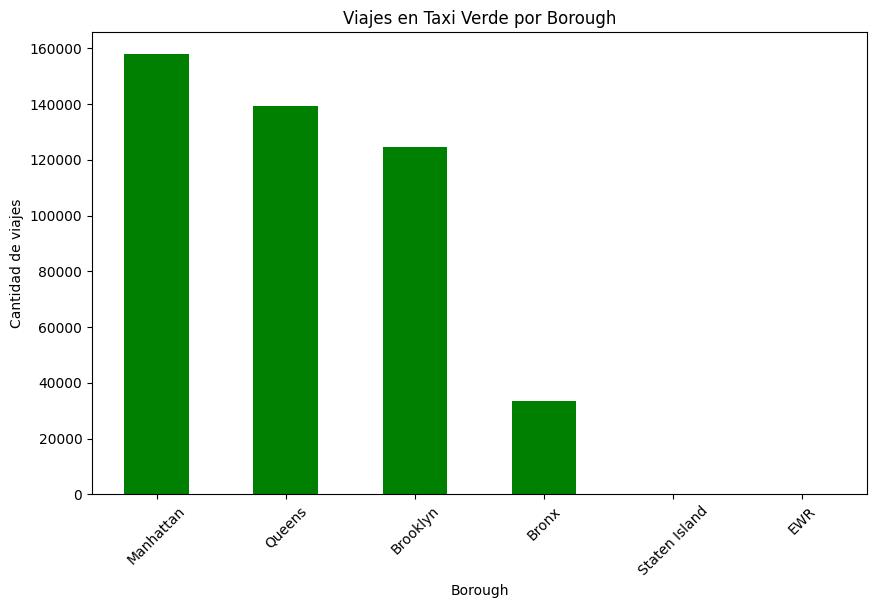

In [16]:
borough_counts = df['Borough'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='green')
plt.title('Viajes en Taxi Verde por Borough')
plt.xlabel('Borough')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.show()

Notamos que Manhattan lidera pero seguido sin tanta distancia por Queen y Brooklyn, tambien que Staten Island y EWR no poseen viajes Verdes